### Raíces de funciones

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

Método de Newton-Raphson

In [14]:
def mi_fun(x):
    return np.sin(x)/x

def mi_fun_p(x):
    return np.cos(x)/x - np.sin(x)/x**2

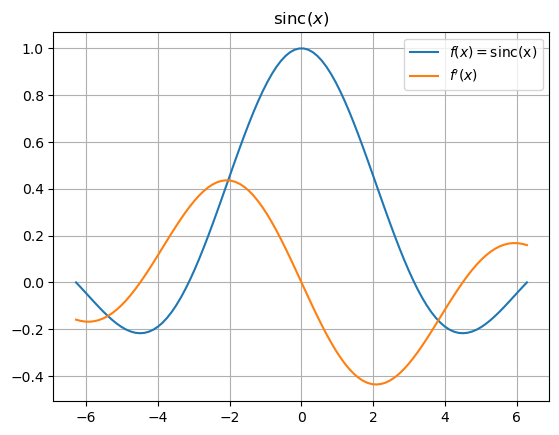

In [23]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
y = mi_fun(x)
dy = mi_fun_p(x)

plt.title(r'sinc($x$)')
plt.plot(x, y, label=r"$f(x) = \rm{sinc}(x)$")
plt.plot(x,dy, label=r"$f'(x)$")
plt.grid(), plt.legend()
plt.show()

In [34]:
def raiz_newton_analitica(f, fp,  x0, err = 1e-8):
    contador = 0
    d_raiz = 2*err
    
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        x0 = x0 - f(x0)/fp(x0)
        d_raiz = abs(x0 - x_old)
        
        contador += 1
        print(contador, '\t', x0, '\t', d_raiz)

    return x0

In [43]:
x0 = raiz_newton_analitica(mi_fun,mi_fun_p,2)

1 	 3.044214599933897 	 1.044214599933897
2 	 3.1388643666227196 	 0.09464976668882263
3 	 3.1415902909919593 	 0.002725924369239685
4 	 3.1415926535880163 	 2.362596057015054e-06
5 	 3.141592653589793 	 1.7768009286101005e-12


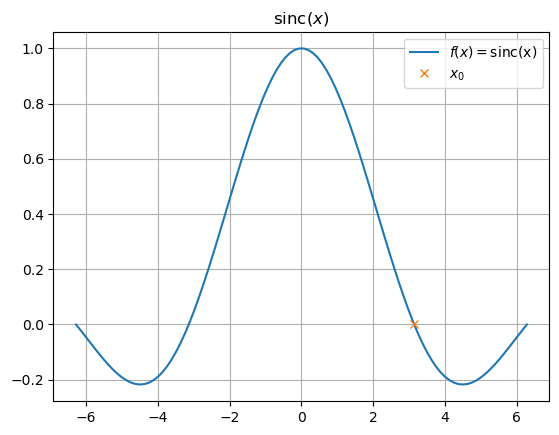

In [44]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
y = mi_fun(x)

plt.title(r'sinc($x$)')
plt.plot(x, y, label=r"$f(x) = \rm{sinc}(x)$")
plt.plot(x0, [0], 'x', label=r"$x_0$")
plt.grid(), plt.legend()
plt.show()

In [50]:
def raiz_newton(f,  x0, err = 1e-8, h=1e-5): # El error de la derivada es h²
    contador = 0
    d_raiz = 2*err
    
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        fp =  (f(x0+h) - f(x0-h)) / (2*h) # Derivada h²
        x0 = x0 - f(x0)/fp
        d_raiz = abs(x0 - x_old)
        
        contador += 1
        print(contador, '\t', x0, '\t', d_raiz)

    return x0

In [51]:
x0 = raiz_newton(mi_fun,2)

1 	 3.0442145999380683 	 1.0442145999380683
2 	 3.1388643666230323 	 0.09464976668496394
3 	 3.1415902909919597 	 0.0027259243689274903
4 	 3.1415926535880163 	 2.3625960565709647e-06
5 	 3.141592653589793 	 1.7768009286101005e-12


Se dice que este método converge cuadráticamente. El problema es que depende del punto inicial en el que nos paremos, ya sea porque la tangente nos aleja mucho del punto inicial, o porque hay una asíntota.